<center> 

# EN3160 Assignment 2
## Fitting

### Priyankan V. - 210498T
</center>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from skimage.feature import peak_local_max

%matplotlib inline

#### Question 1

In [30]:
img1 = cv.imread('images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
assert img1 is not None, 'Image not found'

# cv.namedWindow("images",cv.WINDOW_AUTOSIZE)
# cv.imshow("images",img)
# cv.waitKey(0)
# cv.destroyAllWindows()

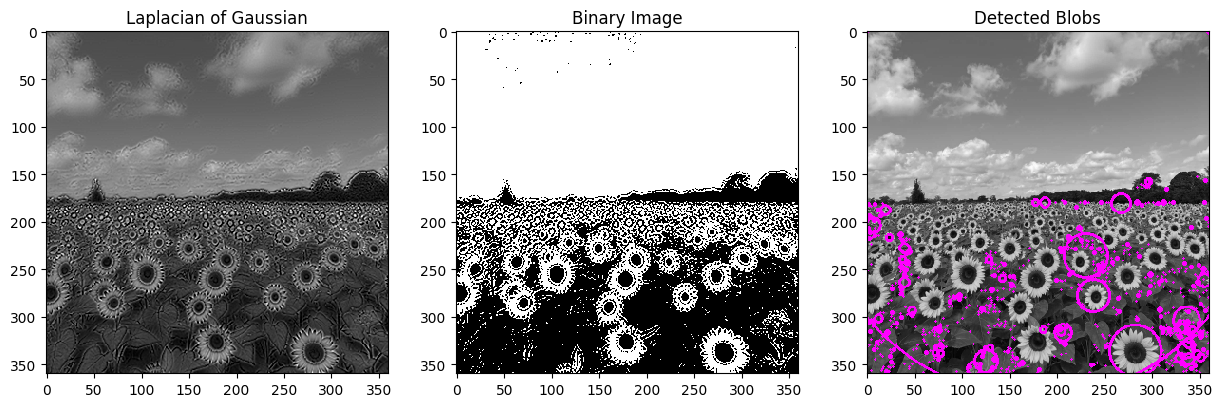

Number of detected blobs: 624


In [41]:
def generate_gaussian_kernel(dim, sigma_val, display=False):
    """Generate a 2D Gaussian kernel with a specified size and sigma."""
    axis_1D = np.linspace(-(dim // 2), dim // 2, dim)
    kernel_1D = np.exp(-(axis_1D ** 2) / (2 * sigma_val ** 2)) / (sigma_val * np.sqrt(2 * np.pi))
    kernel_2D = np.outer(kernel_1D, kernel_1D)

    kernel_2D /= kernel_2D.max()  # Normalize the kernel so its max value is 1.

    if display:
        plt.imshow(kernel_2D, cmap='gray', interpolation='none')
        plt.title("Gaussian Kernel")
        plt.show()

    return kernel_2D

# Parameters
sigma_val = 0.64

# Create a Gaussian kernel
gaussian_kernel_2D = generate_gaussian_kernel(5, sigma_val, display=False)

# Calculate the Laplacian of the Gaussian kernel
laplacian_of_gaussian_kernel = cv.Laplacian(gaussian_kernel_2D, cv.CV_64F) * sigma_val**2

# Apply the Laplacian of Gaussian kernel to the input image
laplacian_filtered_image = cv.filter2D(img1, -1, laplacian_of_gaussian_kernel)

# Threshold the filtered image
threshold = 75  # Modify as necessary
_, binary_output = cv.threshold(np.abs(laplacian_filtered_image), threshold, 255, cv.THRESH_BINARY)

# Extract contours from the binary image
contour_list, _ = cv.findContours(binary_output.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw detected contours as circles on the original image
final_image = cv.cvtColor(img1, cv.COLOR_GRAY2BGR)

for contour in contour_list:
    # Compute the center and radius for each detected blob
    (center_point, radius) = cv.minEnclosingCircle(contour)
    center_coords = (int(center_point[0]), int(center_point[1]))
    radius = int(radius)

    # Draw circles on the image
    cv.circle(final_image, center_coords, radius, (255, 0, 255), 2)  # Purple circles, thickness=2

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(laplacian_filtered_image, cmap='gray', interpolation='none')
plt.title("Laplacian of Gaussian")

plt.subplot(1, 3, 2)
plt.imshow(binary_output, cmap='gray', interpolation='none')
plt.title("Binary Image")

plt.subplot(1, 3, 3)
plt.imshow(final_image, cmap='gray', interpolation='none')
plt.title("Detected Blobs")

plt.show()

# Display the number of detected blobs
print(f"Number of detected blobs: {len(contour_list)}")


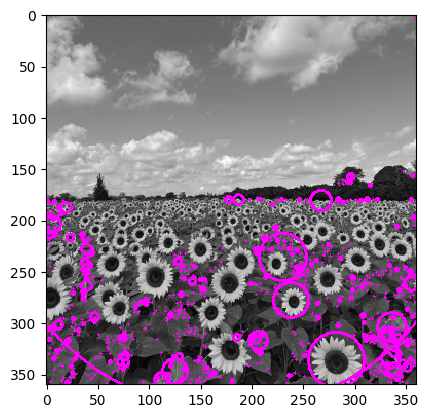

In [42]:
plt.imshow(final_image, interpolation='none', cmap='gray')

plt.show()

# D:\OneDrive - University of Moratuwa\In21 S5\EN3160 Image Processing and Machine Vision - 3\CA\Assignments\2

#### Question 2

In [43]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import math
from scipy import optimize
import random
from matplotlib.patches import Circle

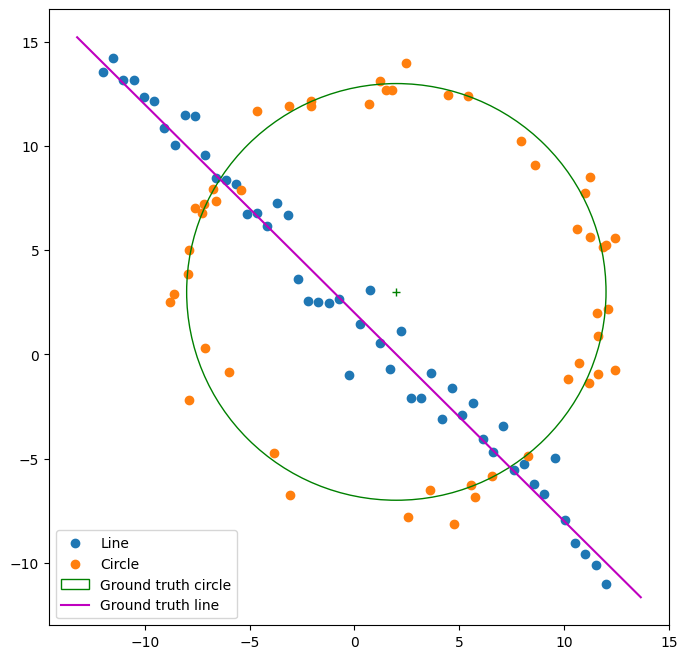

In [44]:

N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16

t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')

ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()
plt.show()

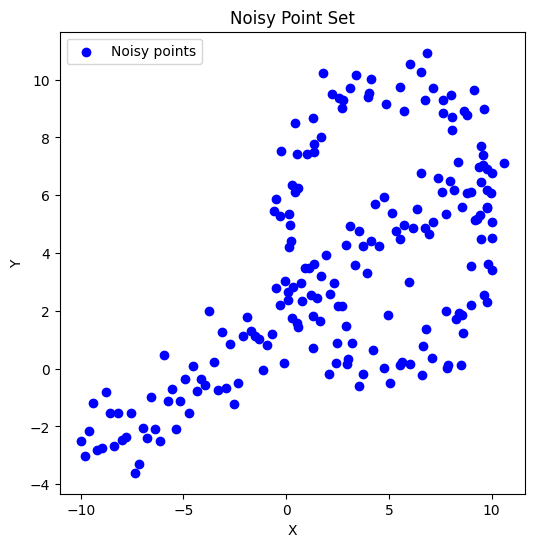

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create points that fit a line (y = mx + c) with some noise
m = 0.5  # slope of the line
c = 2  # y-intercept
num_line_points = 100
x_line = np.linspace(-10, 10, num_line_points)
y_line = m * x_line + c + np.random.normal(scale=1.0, size=num_line_points)  # Adding noise

# Create points that fit a circle with some noise
center = np.array([5, 5])  # center of the circle
radius = 5
num_circle_points = 100
theta = np.linspace(0, 2 * np.pi, num_circle_points)
x_circle = center[0] + radius * np.cos(theta) + np.random.normal(scale=0.5, size=num_circle_points)
y_circle = center[1] + radius * np.sin(theta) + np.random.normal(scale=0.5, size=num_circle_points)

# Combine points into one dataset
x_points = np.concatenate([x_line, x_circle])
y_points = np.concatenate([y_line, y_circle])

# Plot the noisy point set
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='blue', label='Noisy points')
plt.title('Noisy Point Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


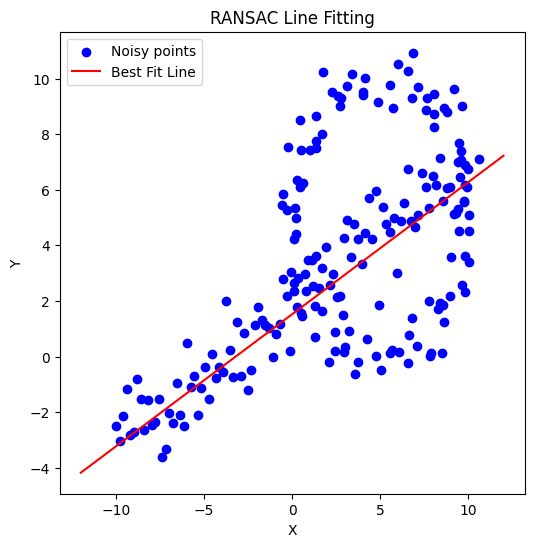

Best line parameters: a=0.42928888051633457, b=-0.9031672364878125, d=1.3745366712197413
Number of inliers: 113


In [46]:
from numpy.linalg import norm

def calculate_line_normal_form(p1, p2):
    """Calculate the line equation parameters from two points: ax + by + d = 0.
    Return the normalized [a, b] and distance d (so that ∥[a,b]⊺∥ = 1).
    """
    a = p2[1] - p1[1]
    b = p1[0] - p2[0]
    d = -(a * p1[0] + b * p1[1])
    norm_factor = norm([a, b])
    return a / norm_factor, b / norm_factor, d / norm_factor

def calculate_perpendicular_distance(a, b, d, point):
    """Calculate the perpendicular distance from a point to the line ax + by + d = 0."""
    x, y = point
    return abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)

def ransac_line_fitting(points, num_iterations, distance_threshold, min_inliers):
    best_line = None
    best_inliers = []
    num_points = points.shape[0]

    for _ in range(num_iterations):
        # Randomly select two points
        idxs = np.random.choice(num_points, 2, replace=False)
        p1, p2 = points[idxs]

        # Calculate line parameters (a, b, d) in the form ax + by + d = 0
        a, b, d = calculate_line_normal_form(p1, p2)

        # Calculate perpendicular distances and find inliers
        inliers = []
        for i in range(num_points):
            point = points[i]
            distance = calculate_perpendicular_distance(a, b, d, point)
            if distance < distance_threshold:
                inliers.append(i)

        # Update if we find a better model (more inliers)
        if len(inliers) > len(best_inliers) and len(inliers) > min_inliers:
            best_inliers = inliers
            best_line = (a, b, d)

    return best_line, best_inliers

# Format points as (x, y)
points = np.column_stack((x_points, y_points))

# RANSAC parameters
num_iterations = 1000
distance_threshold = 1.5
min_inliers = 50

# Estimate the best fitting line using RANSAC
best_line, inliers = ransac_line_fitting(points, num_iterations, distance_threshold, min_inliers)

# Extract the line parameters
a, b, d = best_line

# Plot the original points and the best fit line
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='blue', label='Noisy points')

# Plot the line
x_vals = np.linspace(-12, 12, 100)
y_vals = -(a * x_vals + d) / b
plt.plot(x_vals, y_vals, color='red', label='Best Fit Line')

plt.title('RANSAC Line Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Best line parameters: a={a}, b={b}, d={d}")
print(f"Number of inliers: {len(inliers)}")


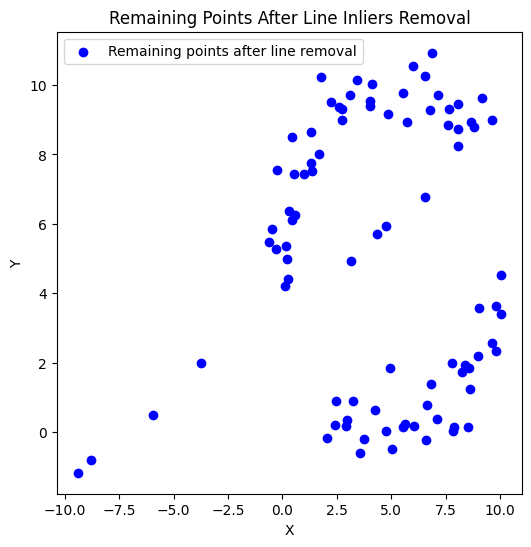

In [47]:
# Remove the line inliers from the dataset
remaining_points = np.delete(points, inliers, axis=0)

# Plot the points after removing the line inliers
plt.figure(figsize=(6, 6))
plt.scatter(remaining_points[:, 0], remaining_points[:, 1], color='blue', label='Remaining points after line removal')
plt.title('Remaining Points After Line Inliers Removal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

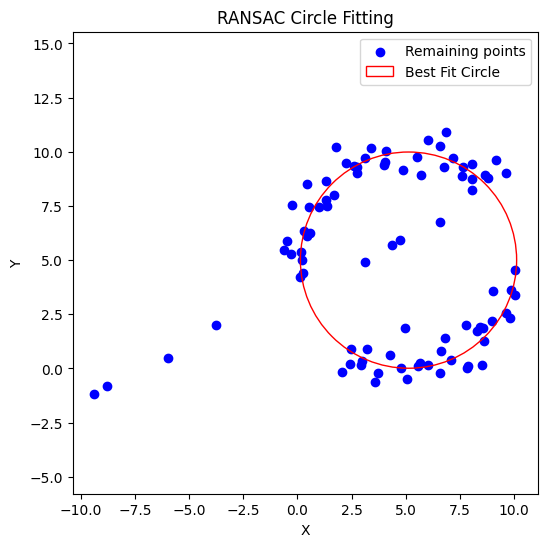

Best circle parameters: center=(5.128052439434477, 4.998524449907379), radius=4.990234297497052
Number of circle inliers: 56


In [48]:
def estimate_circle_from_three_points(p1, p2, p3):
    """Estimate the center and radius of a circle given three points."""
    A = np.array([[p1[0], p1[1], 1], [p2[0], p2[1], 1], [p3[0], p3[1], 1]])
    B = np.array([-(p1[0]**2 + p1[1]**2), -(p2[0]**2 + p2[1]**2), -(p3[0]**2 + p3[1]**2)])
    
    # Solving for circle parameters
    params = np.linalg.lstsq(A, B, rcond=None)[0]
    x_c = -0.5 * params[0]
    y_c = -0.5 * params[1]
    radius = np.sqrt((params[0]**2 + params[1]**2) / 4 - params[2])
    
    return x_c, y_c, radius

def calculate_radial_distance(x_c, y_c, radius, point):
    """Calculate the radial distance between a point and the circle (centered at (x_c, y_c) with radius r)."""
    x, y = point
    return abs(np.sqrt((x - x_c)**2 + (y - y_c)**2) - radius)

def ransac_circle_fitting(points, num_iterations, distance_threshold, min_inliers):
    best_circle = None
    best_inliers = []
    num_points = points.shape[0]

    for _ in range(num_iterations):
        # Randomly select three points
        idxs = np.random.choice(num_points, 3, replace=False)
        p1, p2, p3 = points[idxs]

        # Estimate circle parameters (x_c, y_c, r)
        try:
            x_c, y_c, radius = estimate_circle_from_three_points(p1, p2, p3)
        except np.linalg.LinAlgError:
            continue  # Skip invalid points that do not form a valid circle

        # Calculate radial distances and find inliers
        inliers = []
        for i in range(num_points):
            point = points[i]
            distance = calculate_radial_distance(x_c, y_c, radius, point)
            if distance < distance_threshold:
                inliers.append(i)

        # Update if we find a better model (more inliers)
        if len(inliers) > len(best_inliers) and len(inliers) > min_inliers:
            best_inliers = inliers
            best_circle = (x_c, y_c, radius)

    return best_circle, best_inliers

# RANSAC parameters for circle fitting
num_iterations_circle = 1000
distance_threshold_circle = 0.5
min_inliers_circle = 30

# Estimate the best fitting circle using RANSAC
best_circle, circle_inliers = ransac_circle_fitting(remaining_points, num_iterations_circle, distance_threshold_circle, min_inliers_circle)

# Extract the circle parameters
x_c, y_c, radius = best_circle

# Plot the remaining points and the best fit circle
plt.figure(figsize=(6, 6))
plt.scatter(remaining_points[:, 0], remaining_points[:, 1], color='blue', label='Remaining points')

# Plot the circle
circle_plot = plt.Circle((x_c, y_c), radius, color='red', fill=False, label='Best Fit Circle')
plt.gca().add_patch(circle_plot)

plt.title('RANSAC Circle Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()

print(f"Best circle parameters: center=({x_c}, {y_c}), radius={radius}")
print(f"Number of circle inliers: {len(circle_inliers)}")


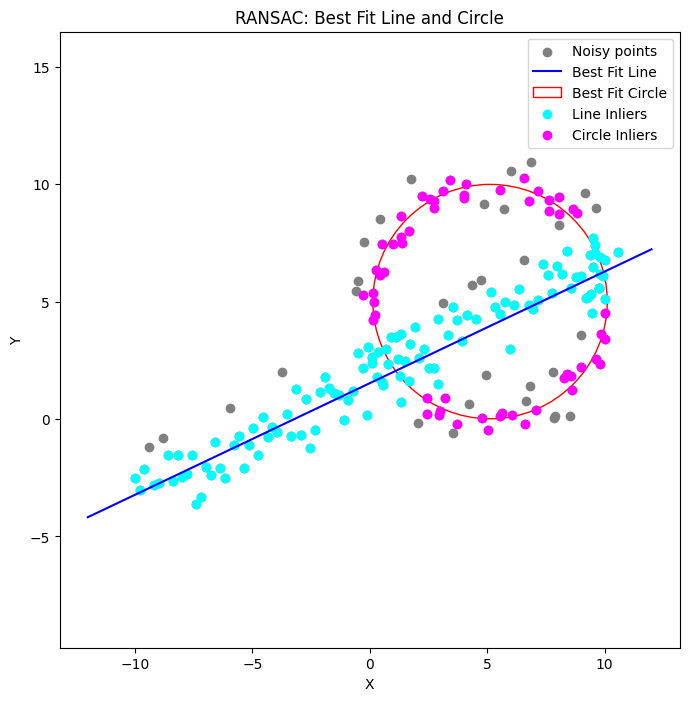

In [49]:
# Combine the results into one plot
plt.figure(figsize=(8, 8))

# Plot original noisy points
plt.scatter(x_points, y_points, color='gray', label='Noisy points')

# Plot the best fit line
x_vals = np.linspace(-12, 12, 100)
y_vals = -(a * x_vals + d) / b
plt.plot(x_vals, y_vals, color='blue', label='Best Fit Line')

# Plot the best fit circle
circle_plot = plt.Circle((x_c, y_c), radius, color='red', fill=False, label='Best Fit Circle')
plt.gca().add_patch(circle_plot)

# Plot inliers for the line
line_inliers_points = points[inliers]
plt.scatter(line_inliers_points[:, 0], line_inliers_points[:, 1], color='cyan', label='Line Inliers')

# Plot inliers for the circle
circle_inliers_points = remaining_points[circle_inliers]
plt.scatter(circle_inliers_points[:, 0], circle_inliers_points[:, 1], color='magenta', label='Circle Inliers')

plt.title('RANSAC: Best Fit Line and Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()
